In [53]:
import numpy as np

class Perceptron:
    def __init__(self, weights, bias, alpha):
        self.weights = weights
        self.bias = bias
        self.alpha = alpha
        self.errors=[]

    def activation(self, x):
        # Step function
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        # Weighted sum of inputs
        total = np.dot(inputs, self.weights) + self.bias
        # Activation function
        return self.activation(total)

    def train(self, training_inputs, labels, epochs):
        for epoch in range(epochs):
            epoch_error = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                epoch_error += error ** 2 
                # Update weights and bias
                self.weights += self.alpha * error * inputs
                self.bias += self.alpha * error
            self.errors.append(epoch_error)
            if epoch > 0 and self.errors[epoch] == 0:
                break

# AND gate
and_gate_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_gate_labels = np.array([0, 0, 0, 1])

# Initialize perceptron with given parameters
and_perceptron = Perceptron(weights=np.array([0.2, 0.75]), bias=10, alpha=0.05)

print("Training AND gate perceptron:")
and_perceptron.train(and_gate_inputs, and_gate_labels, epochs=1000)

# Test AND gate
print("AND Gate Test:")
for inputs in and_gate_inputs:
    print(f"{inputs} => {and_perceptron.predict(inputs)}")

# XOR gate
xor_gate_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_gate_labels = np.array([0, 1, 1, 0])

# Initialize perceptron with given parameters
xor_perceptron = Perceptron(weights=np.array([0.2, 0.75]), bias=10, alpha=0.05)

print("\nTraining XOR gate perceptron:")
xor_perceptron.train(xor_gate_inputs, xor_gate_labels, epochs=1000)

# Test XOR gate
print("XOR Gate Test:")
for inputs in xor_gate_inputs:
    print(f"{inputs} => {xor_perceptron.predict(inputs)}")


Training AND gate perceptron:
AND Gate Test:
[0 0] => 0
[0 1] => 0
[1 0] => 0
[1 1] => 1

Training XOR gate perceptron:
XOR Gate Test:
[0 0] => 1
[0 1] => 0
[1 0] => 0
[1 1] => 0


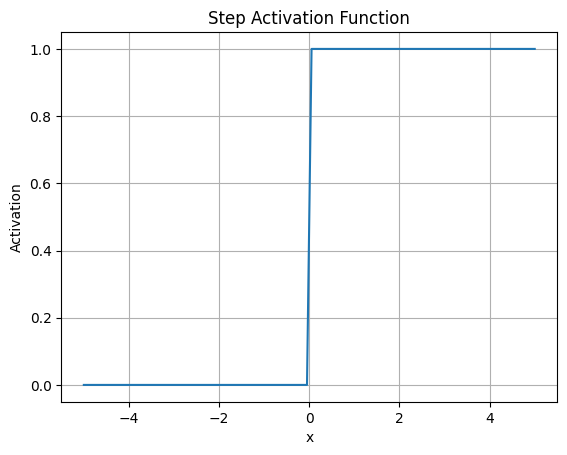

Training AND gate perceptron:
AND Gate Test:
[0 0] => 0
[0 1] => 0
[1 0] => 0
[1 1] => 1


In [54]:
# Define step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Plot step activation function
x_values = np.linspace(-5, 5, 100)
y_values = [step_activation(x) for x in x_values]

plt.plot(x_values, y_values)
plt.title('Step Activation Function')
plt.xlabel('x')
plt.ylabel('Activation')
plt.grid(True)
plt.show()

# AND gate
and_gate_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_gate_labels = np.array([0, 0, 0, 1])

# Initialize perceptron with given parameters
and_perceptron = Perceptron(weights=np.array([0.2, 0.75]), bias=10, alpha=0.05)

print("Training AND gate perceptron:")
and_perceptron.train(and_gate_inputs, and_gate_labels, epochs=1000)

# Test AND gate
print("AND Gate Test:")
for inputs in and_gate_inputs:
    print(f"{inputs} => {and_perceptron.predict(inputs)}")

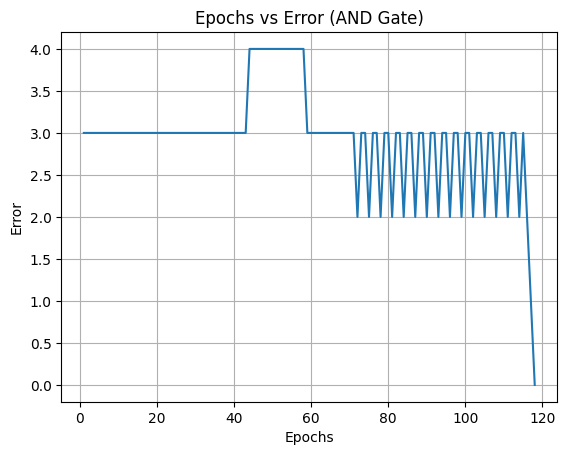

In [55]:
plt.plot(range(1, len(and_perceptron.errors) + 1), and_perceptron.errors)
plt.title('Epochs vs Error (AND Gate)')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.grid(True)
plt.show()

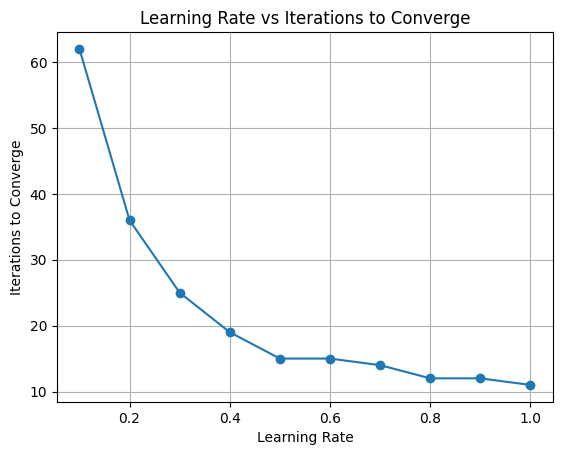

In [56]:
weights = np.array([0.2, 0.75])
bias = 10
epochs = 1000

learning_rates = np.arange(0.1, 1.1, 0.1)
iterations_to_converge = []

for alpha in learning_rates:
    # Initialize perceptron with current learning rate
    and_perceptron = Perceptron(weights=weights, bias=bias, alpha=alpha)
    # Train perceptron
    and_perceptron.train(and_gate_inputs, and_gate_labels, epochs=epochs)
    # Store number of iterations taken to converge
    iterations_to_converge.append(len(and_perceptron.errors))

# Plot learning rate vs number of iterations to converge
plt.plot(learning_rates, iterations_to_converge, marker='o')
plt.title('Learning Rate vs Iterations to Converge')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.grid(True)
plt.show()

[2.2  1.05]
[-0.2  -0.15]
[-0.4  -0.35]
[-0.4  -0.65]
[-0.8  -1.05]
[-1.3  -1.05]
[-1.3  -1.05]
[-1.3  -1.05]
[-1.3  -1.85]
[-1.3  -1.85]


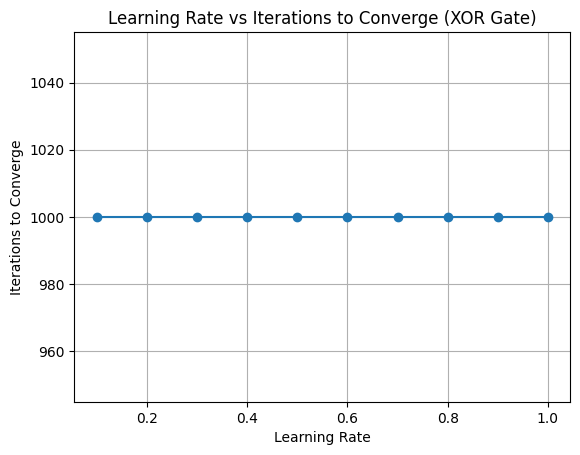

In [57]:
learning_rates = np.arange(0.1, 1.1, 0.1)
iterations_to_converge = []

for alpha in learning_rates:
    # Initialize perceptron with current learning rate
    xor_perceptron = Perceptron(weights=weights, bias=bias, alpha=alpha)
    # Train perceptron
    xor_perceptron.train(xor_gate_inputs, xor_gate_labels, epochs=epochs)
    # Store number of iterations taken to converge if converged, otherwise store maximum epochs
    iterations_to_converge.append(len(xor_perceptron.errors) if xor_perceptron.errors[-1] == 0 else epochs)

# Plot learning rate vs number of iterations to converge
plt.plot(learning_rates, iterations_to_converge, marker='o')
plt.title('Learning Rate vs Iterations to Converge (XOR Gate)')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.grid(True)
plt.show()

Training AND gate perceptron with step activation function:
Number of epochs taken to converge: 1000
Training AND gate perceptron with bipolar_step activation function:
Number of epochs taken to converge: 1000
Training AND gate perceptron with sigmoid activation function:
Number of epochs taken to converge: 1000
Training AND gate perceptron with relu activation function:
Number of epochs taken to converge: 1000


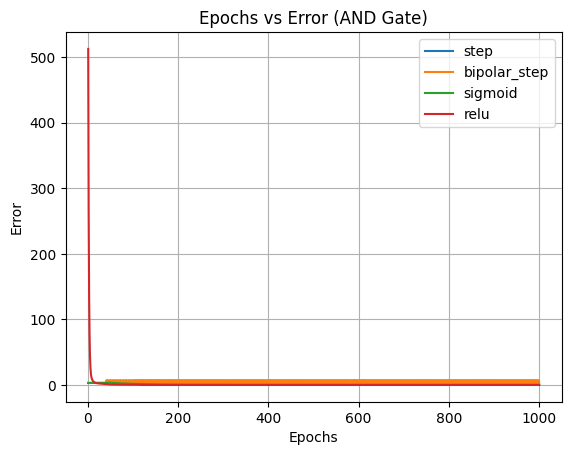

In [58]:
class Perceptron:
    def __init__(self, weights, bias, alpha, activation_func):
        self.weights = weights
        self.bias = bias
        self.alpha = alpha
        self.activation_func = activation_func
        self.errors = []  # List to store errors after each epoch

    def activation(self, x):
        if self.activation_func == 'step':
            # Step function
            return 1 if x >= 0 else 0
        elif self.activation_func == 'bipolar_step':
            # Bi-polar step function
            return 1 if x > 0 else (-1 if x < 0 else 0)
        elif self.activation_func == 'sigmoid':
            # Sigmoid function
            return 1 / (1 + np.exp(-2 * x))
        elif self.activation_func == 'relu':
            # ReLU function
            return max(0, x)

    def predict(self, inputs):
        # Weighted sum of inputs
        total = np.dot(inputs, self.weights) + self.bias
        # Activation function
        return self.activation(total)

    def train(self, training_inputs, labels, epochs):
        for epoch in range(epochs):
            epoch_error = 0  # Error for this epoch
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                epoch_error += error ** 2  # Accumulate squared error
                # Update weights and bias
                self.weights += self.alpha * error * inputs
                self.bias += self.alpha * error
            self.errors.append(epoch_error)  # Store error for this epoch

# Define activation functions
def bipolar_step_activation(x):
    return 1 if x > 0 else (-1 if x < 0 else 0)

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-2 * x))

def relu_activation(x):
    return max(0, x)

# AND gate
and_gate_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_gate_labels = np.array([0, 0, 0, 1])

# Learning parameters
weights = np.array([0.2, 0.75])
bias = 10
alpha = 0.05
epochs = 1000

activation_functions = ['step', 'bipolar_step', 'sigmoid', 'relu']
for activation_func in activation_functions:
    # Initialize perceptron with given parameters and activation function
    and_perceptron = Perceptron(weights=weights, bias=bias, alpha=alpha, activation_func=activation_func)
    print(f"Training AND gate perceptron with {activation_func} activation function:")
    and_perceptron.train(and_gate_inputs, and_gate_labels, epochs=epochs)
    print(f"Number of epochs taken to converge: {len(and_perceptron.errors)}")

    # Plot epochs against error values
    plt.plot(range(1, len(and_perceptron.errors) + 1), and_perceptron.errors, label=activation_func)

plt.title('Epochs vs Error (AND Gate)')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()
